# Goal: Compare two image histograms

## subgoal: how to extract image into a histogram?

### histogram of a grayscale image 

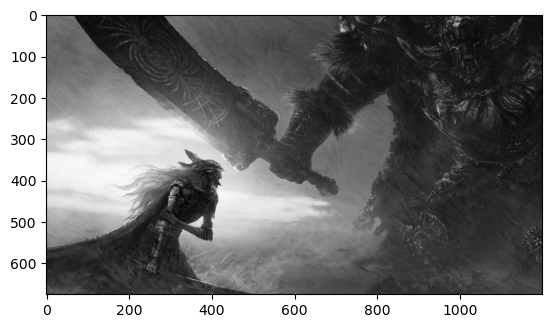

In [1]:
# read the image - grayscale it

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import skimage as ski


# load the image + convert to grayscale

img = cv.imread('Images/ER.jpg', cv.IMREAD_GRAYSCALE)

# convert img to flat dtype with value range from 0 to 1
img_01 = ski.util.img_as_float(img)

# display the image
fig, ax = plt.subplots()
ax.imshow(img_01, cmap='gray')

In [2]:
# create histogram of an img
histogram, bin_edges = np.histogram(img_01, bins=256, range=(0, 1))
# bins: number of bins to use for the histogram
# (0,1) range: value range for input from img_01
# first output np.histogram: 1D numpy-array - with 256 rows and 1 column
# second output np.histogram: bin edges - 1 column and 257 rows (1 more than the histogram)

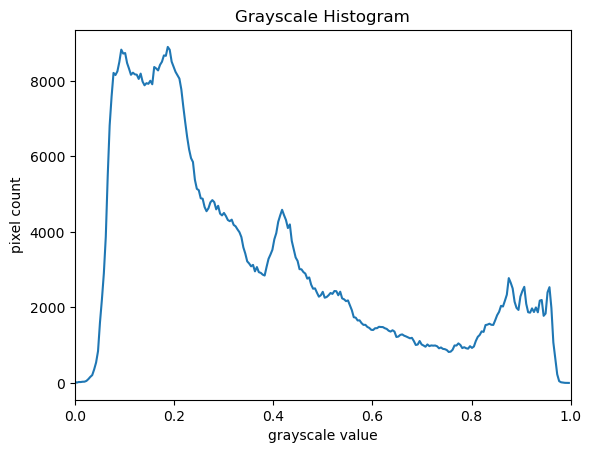

In [3]:
# display the histogram
fig, ax = plt.subplots()
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixel count")
ax.set_xlim([0.0, 1.0])  # <- named arguments do not work here

ax.plot(bin_edges[0:-1], histogram)  # 0: black, 1: white

### histogram of a coloured image 

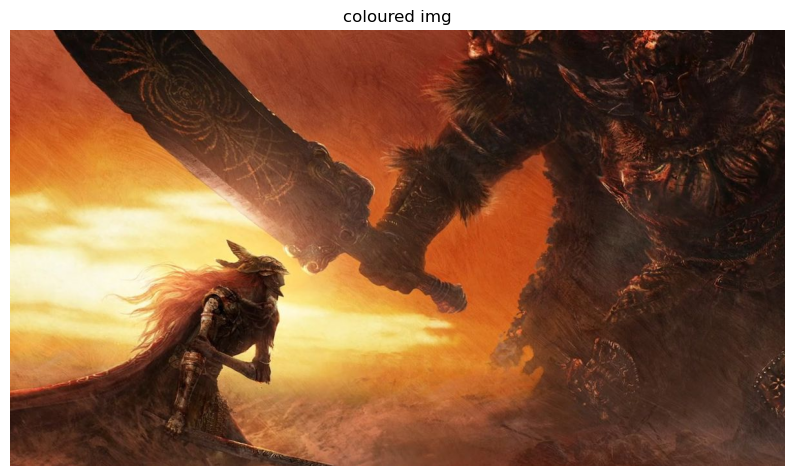

In [4]:
# load the image into RGB
img = cv.imread('Images/ER.jpg')

# need to convert BGR to RGB for matplotlib display
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# show img
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.title('coloured img')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Pixel count')

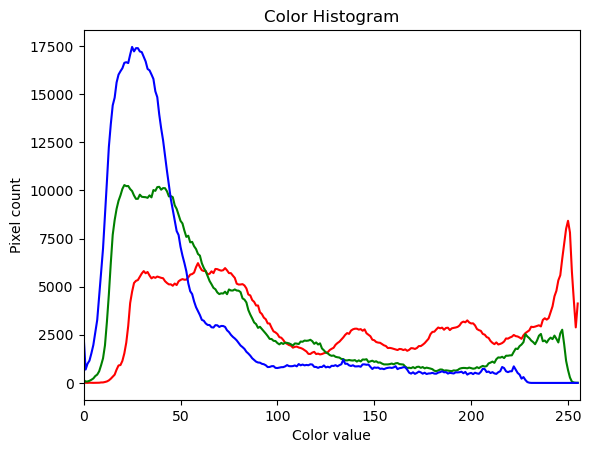

In [5]:
# tuple to select each of the colour line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
fig, ax = plt.subplots()
ax.set_xlim([0, 256])
for channel_id, color in enumerate(colors): # (channel_id, color) is used. 
    """First loop instance: channel_id is 0 - red colour channel 'red'
       Second loop instance:  index is 1 - corresponding to 'green'
       Third loop: 2 and 'blue'
    """
    histogram, bin_edges = np.histogram(
        img_rgb[:, :, channel_id], bins=256, range=(0, 256) # first ':': row, 2nd one is column
    )
    ax.plot(bin_edges[0:-1], histogram, color=color)

ax.set_title("Color Histogram")
ax.set_xlabel("Color value")
ax.set_ylabel("Pixel count")


list = ("a", "b", "c", "d", "e")

for x in enumerate(list):
    print(x)

(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')
(4, 'e')

(0.0, 256.0)

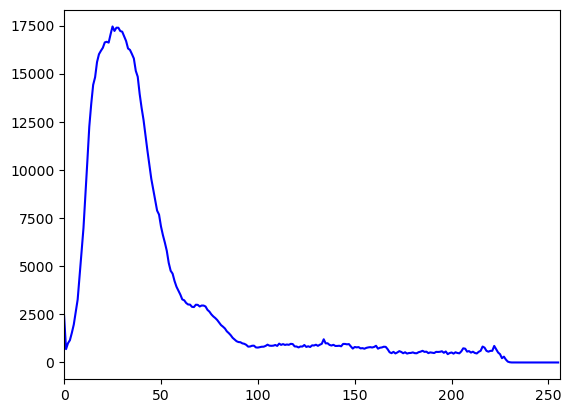

In [6]:
# try - using cv.calcHist() for Blue
hist = cv.calcHist([img], [0], None, [256], [0,256])

plt.plot(hist, color='b')
plt.xlim([0,256])

Flattened feature vector size: 768


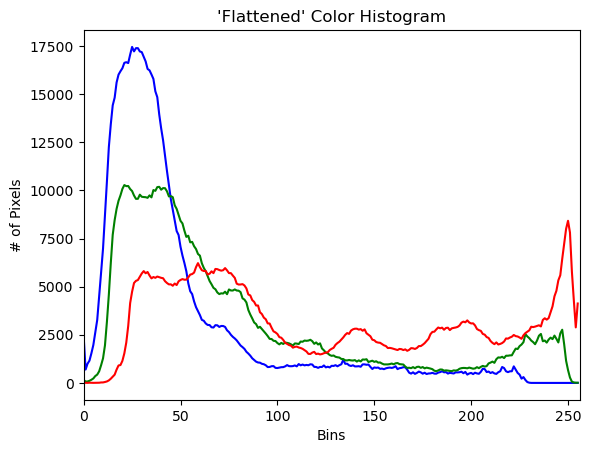

In [9]:
# make it a loop - displaying all 3 colours
channels = cv.split(img) # split into 3 2D arrays, one for each colour channel: Blue, Green, Red
# channels = [blue_channel, green_channel, red_channel]


colours = ('b', 'g', 'r')
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []

# loop over the image channels
for (channel, colour) in zip(channels, colours): # why loop here? why zip
    """create a hist for the current channel AND concat resulting hists for each channel"""
    hist = cv.calcHist([channel], [0], None, [256], [0,256])
    features.extend(hist)
    
    # plot the hist
    plt.plot(hist, color=colour)
    plt.xlim([0,256])
    
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print(f"Flattened feature vector size: {np.array(features).flatten().shape[0]}")

